# Bias masing masing portal berita

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None) #membaca dataset secara keseluruhan
df = pd.read_csv('Dataset/Berita/Berita Neraca Produksi (Q1-Q2 2021).csv',  delimiter=';') #membaca dataset

In [2]:
df

id   sumber kodekat kodesubkat  \
0      00e3395ef29   Antara       J          J   
1      00fadafbe7d   Antara       A         A2   
2      0126ee19f2a    Detik       F          F   
3      0133f12a935    Detik       D         D1   
4      01382b466ed   Antara       K         K1   
...            ...      ...     ...        ...   
75549  fffb5bfd7d5   Antara       K         K1   
75550  fffca0ed375    Detik       A       A1.b   
75551  fffddc5c58d  Okezone       I         I1   
75552  fffe2ad3afd  Okezone       K         K1   
75553  ffff018963e    Detik       K         K4   

                                   kategori  \
0                  Informasi dan Komunikasi   
1       Pertanian, Kehutanan, dan Perikanan   
2                                Konstruksi   
3                 Pengadaan Listrik dan Gas   
4      Jasa Perantara Keuangan dan Asuransi   
...                                     ...   
75549  Jasa Perantara Keuangan dan Asuransi   
75550   Pertanian, Kehutanan, dan Perikanan   
75551  Penyediaan Akomodasi dan Makan Minum   
75552  Jasa Perantara Keuangan dan Asuransi   
75553  Jasa Perantara Keuangan dan Asuransi   

                                             subkategori  \
0                               Informasi dan Komunikasi   
1                          Kehutanan dan Penebangan Kayu   
2                                             Konstruksi   
3                                      Ketenagalistrikan   
4                                Jasa Perantara Keuangan   
...                                                  ...   
75549                            Jasa Perantara Keuangan   
75550  Pertanian, Peternakan, Perburuan dan Jasa Pert...   
75551                               Penyediaan Akomodasi   
75552                            Jasa Perantara Keuangan   
75553                            Jasa Penunjang Keuangan   

                     katakunci     tanggal  \
0             Laporan keuangan  2021-02-05   
1                  hasil hutan  2021-01-10   
2                Infrastruktur  2021-01-24   
3                  Listrik PLN  2021-03-05   
4                   suku bunga  2021-05-20   
...                        ...         ...   
75549                   kredit  2021-06-16   
75550   Produksi Bawang Merah   2021-01-25   
75551            libur lebaran  2021-04-05   
75552                   kredit  2021-03-30   
75553  nilai perdagangan saham  2021-04-01   

                                            judul_berita  \
0      ASN penyeleweng dana infak Masjid Raya divonis...   
1      Apkasindo: RPP Cipta Kerja Sektor Kehutanan ru...   
2      Cile Diguncang Gempa, Belum Ada Laporan Kerusa...   
3                 Batam Bakal Punya PLTU Biomassa 200 MW   
4      Di Paripurna DPR, Sri Mulyani paparkan 5 fokus...   
...                                                  ...   
75549  Legislator: Perbankan berperan penting dukung ...   
75550  4 Sebab Pengusaha Resah Beras Murah Vietnam Re...   
75551  Mau Pergi ke Luar Kota saat Libur Lebaran? Waj...   
75552  Pengusaha Mikro Bakal Dapat BLT dan Kredit Mac...   
75553  Debut di Pasar Modal, Saham Kurir Makanan Onli...   

                                           konten_berita  \
0      Padang (ANTARA) - Oknum Aparatur Sipil Negara ...   
1      Jakarta (ANTARA) - Asosiasi Petani Kelapa Sawi...   
2      Santiago - Dua gempa bumi yang hampir bersamaa...   
3      Jakarta -\n\nBright PLN Batam akan membangun d...   
4      Reformasi struktural ini harus disertai pengua...   
...                                                  ...   
75549  Di samping itu, perbankan menjadi tulang pungg...   
75550  Jakarta -\n\nRembesnya beras Vietnam jenis jas...   
75551  PEMERINTAH Indonesia resmi melarang perjalanan...   
75552  JAKARTA - Provinsi Bali merupakan satu-satunya...   
75553  Jakarta -\n\nPerusahaan pengiriman makanan onl...   

                                              nama_tokoh  \
0                                              ['Rinto']   
1             

In [3]:
kantor_berita = df.iloc[: , 1].values #menyimpan kolom "sumber" ke "kantor_berita" dalam bentuk array
sentimen_berita = df.iloc[: , -2].values #menyimpan kolom "sentimen_berita" ke "sentimen_berita" dalam bentuk array
sentimen_kutipan = df.iloc[: , -1].values #menyimpan kolom "sentimen_kutipan" ke "sentimen_kutipan" dalam bentuk array

In [4]:
compare = (sentimen_berita == sentimen_kutipan)*1 #membandingkan antara "sentimen_berita" dan "sentimen_kutipan" jika sama maka outputnya adalah 1

In [5]:
#menampilkan total dari compare yang hasilnya = 1
import numpy as np
true = np.sum(compare)

true

44199

In [6]:
true/len(df) #menampilkan presentase kesesuaian sentimen berdasarkan keseluruhan portal berita

0.5849988087990047

In [7]:
#memasukan ke kategori bias positif, jika sentimen berita negatif atau netral dan sentimen kutipan positif
#memasukan ke kategori bias negatif, jika sentimen berita positif atau netral dan sentimen kutipan negatif
#memasukan ke kategori bias netral, jika sentimen berita positif atau negatif dan sentimen kutipan netral
#memasukan ke kategori bias jujur, jika sentimen berita sama dengan sentimen kutipan

df['bias_positif'] = (((df['sentimen_berita'] == 'Negatif') | (df['sentimen_berita'] == 'Netral')) & (df['sentimen_kutipan'] == 'Positif'))*1
df['bias_negatif'] = (((df['sentimen_berita'] == 'Positif') | (df['sentimen_berita'] == 'Netral')) & (df['sentimen_kutipan'] == 'Negatif'))*1
df['bias_netral'] = (((df['sentimen_berita'] == 'Positif') | (df['sentimen_berita'] == 'Negatif')) & (df['sentimen_kutipan'] == 'Netral'))*1
df['bias_jujur'] = (df['sentimen_berita'] == df['sentimen_kutipan'])*1

In [8]:
#mengambil data dari tabel lalu mengubah dalam bentuk values
tabel = df.values

In [9]:
tabel

array([['00e3395ef29', 'Antara', 'J', ..., 0, 0, 1],
       ['00fadafbe7d', 'Antara', 'A', ..., 1, 0, 0],
       ['0126ee19f2a', 'Detik', 'F', ..., 0, 0, 1],
       ...,
       ['fffddc5c58d', 'Okezone', 'I', ..., 0, 0, 1],
       ['fffe2ad3afd', 'Okezone', 'K', ..., 0, 0, 1],
       ['ffff018963e', 'Detik', 'K', ..., 0, 0, 1]], dtype=object)

In [10]:
bias_pos = tabel[:,1][tabel[:,-4] == 1] #mengambil nilai seluruh true pada kolom bias positif lalu mengubah kedalam bentuk array 1 dimensu
bias_neg = tabel[:,1][tabel[:,-3] == 1] #mengambil nilai seluruh true pada kolom bias negatif lalu mengubah kedalam bentuk array 1 dimensu
bias_net = tabel[:,1][tabel[:,-2] == 1] #mengambil nilai seluruh true pada kolom bias netral lalu mengubah kedalam bentuk array 1 dimensu
bias_jujur = tabel[:,1][tabel[:,-1] == 1] #mengambil nilai seluruh true pada kolom bias jujur lalu mengubah kedalam bentuk array 1 dimensu

In [11]:
print(len(bias_pos)/len(sentimen_kutipan)) #mengecek presentase bias positif dari keseluruhan data
print(len(bias_neg)/len(sentimen_kutipan)) #mengecek presentase bias negatif dari keseluruhan data
print(len(bias_net)/len(sentimen_kutipan)) #mengecek presentase bias netral dari keseluruhan data
print(len(bias_jujur)/len(sentimen_kutipan)) #mengecek presentase bias jujur dari keseluruhan data

0.13353363157476772
0.09092834264234852
0.19053921698387907
0.5849988087990047


In [12]:
antara_bp = tabel[:,-4][tabel[:,1] == 'Antara'] #mengambil nilai seluruh portal berita Antara pada kolom bias positif lalu mengubah kedalam bentuk array 1 dimensi
panjang_berita_antara = len(antara_bp) #mengambil jumlah panjang pada kolom bias positif dengan ketentuan portal berita antara

antara_bp = antara_bp[antara_bp == 1] #mengambil portal berita Antara yang bernilai true pada kolom bias positif
panjang_antara_bp = len(antara_bp) #mengambil jumlah panjang portal berita Antara yang bernilai true pada kolom bias positif
print('Antara cb bp', panjang_antara_bp/panjang_berita_antara, panjang_antara_bp, panjang_berita_antara)


antara_bn = tabel[:,-3][tabel[:,1] == 'Antara'] #mengambil nilai seluruh portal berita Antara pada kolom bias negatif lalu mengubah kedalam bentuk array 1 dimensi
panjang_berita_antara = len(antara_bn) #mengambil jumlah panjang pada kolom bias negatif dengan ketentuan portal berita Antara

antara_bn = antara_bn[antara_bn == 1] #mengambil portal berita Antara yang bernilai true pada kolom bias positif
panjang_antara_bn = len(antara_bn) #mengambil jumlah panjang portal berita Antara yang bernilai true pada kolom bias positif
print('Antara cb bn', panjang_antara_bn/panjang_berita_antara, panjang_antara_bn, panjang_berita_antara)


antara_bnet = tabel[:,-2][tabel[:,1] == 'Antara'] #mengambil nilai seluruh portal berita Antara pada kolom bias netral lalu mengubah kedalam bentuk array 1 dimensi
panjang_berita_antara = len(antara_bnet) #mengambil jumlah panjang pada kolom bias netral dengan ketentuan portal berita Antara

antara_bnet = antara_bnet[antara_bnet == 1] #mengambil portal berita Antara yang bernilai true pada kolom bias positif
panjang_antara_bnet = len(antara_bnet) #mengambil jumlah panjang portal berita Antara yang bernilai true pada kolom bias positif
print('Antara cb bnet', panjang_antara_bnet/panjang_berita_antara, panjang_antara_bnet, panjang_berita_antara)


antara_jujur = tabel[:,-3][tabel[:,1] == 'Antara'] #mengambil nilai seluruh portal berita Antara pada kolom bias jujur lalu mengubah kedalam bentuk array 1 dimensi
panjang_berita_antara = len(antara_jujur) #mengambil jumlah panjang pada kolom bias jujur dengan ketentuan portal berita Antara

antara_jujur = antara_jujur[antara_jujur == 1] #mengambil portal berita Antara yang bernilai true pada kolom bias positif
panjang_antara_jujur = len(antara_jujur) #mengambil jumlah panjang portal berita Antara yang bernilai true pada kolom bias positif
print('Antara cb jujur', panjang_antara_jujur/panjang_berita_antara, panjang_antara_jujur, panjang_berita_antara)

Antara cb bp 0.14080393513181155 3664 26022
Antara cb bn 0.08738759511182845 2274 26022
Antara cb bnet 0.1682806855737453 4379 26022
Antara cb jujur 0.08738759511182845 2274 26022


In [13]:
# Detik bp
detik_bp = tabel[:,-4][tabel[:,1] == 'Detik']

panjang_berita_detik = len(detik_bp)

detik_bp = detik_bp[detik_bp == 1]
panjang_detik_bp = len(detik_bp)

print('Detik cb bp', panjang_detik_bp/panjang_berita_detik, panjang_detik_bp, panjang_berita_detik)

#detik bn
detik_bn = tabel[:,-3][tabel[:,1] == 'Detik']

panjang_berita_detik = len(detik_bn)

detik_bn = detik_bn[detik_bn == 1]
panjang_detik_bn = len(detik_bn)

print('detik cb bn', panjang_detik_bn/panjang_berita_detik, panjang_detik_bn, panjang_berita_detik)

#detik b net
detik_bnet = tabel[:,-2][tabel[:,1] == 'Detik']

panjang_berita_detik = len(detik_bnet)

detik_bnet = detik_bnet[detik_bnet == 1]
panjang_detik_bnet = len(detik_bnet)

print('detik cb bnet', panjang_detik_bnet/panjang_berita_detik, panjang_detik_bnet, panjang_berita_detik)

#detik jujur
detik_jujur = tabel[:,-3][tabel[:,1] == 'Detik']

panjang_berita_detik = len(detik_jujur)

detik_jujur = detik_jujur[detik_jujur == 1]
panjang_detik_jujur = len(detik_jujur)

print('detik cb jujur', panjang_detik_jujur/panjang_berita_detik, panjang_detik_jujur, panjang_berita_detik)

Detik cb bp 0.13525883022185448 5231 38674
detik cb bn 0.08951750530071884 3462 38674
detik cb bnet 0.1962300253400217 7589 38674
detik cb jujur 0.08951750530071884 3462 38674


In [14]:
# okezone bp
okezone_bp = tabel[:,-4][tabel[:,1] == 'Okezone']

panjang_berita_okezone = len(okezone_bp)

okezone_bp = okezone_bp[okezone_bp == 1]
panjang_okezone_bp = len(okezone_bp)

print('okezone cb bp', panjang_okezone_bp/panjang_berita_okezone, panjang_okezone_bp, panjang_berita_okezone)

#okezone bn
okezone_bn = tabel[:,-3][tabel[:,1] == 'Okezone']

panjang_berita_okezone = len(okezone_bn)

okezone_bn = okezone_bn[okezone_bn == 1]
panjang_okezone_bn = len(okezone_bn)

print('okezone cb bn', panjang_okezone_bn/panjang_berita_okezone, panjang_okezone_bn, panjang_berita_okezone)

#okezone b net
okezone_bnet = tabel[:,-2][tabel[:,1] == 'Okezone']

panjang_berita_okezone = len(okezone_bnet)

okezone_bnet = okezone_bnet[okezone_bnet == 1]
panjang_okezone_bnet = len(okezone_bnet)

print('okezone cb bnet', panjang_okezone_bnet/panjang_berita_okezone, panjang_okezone_bnet, panjang_berita_okezone)

#okezone jujur
okezone_jujur = tabel[:,-3][tabel[:,1] == 'Okezone']

panjang_berita_okezone = len(okezone_jujur)

okezone_jujur = okezone_jujur[okezone_jujur == 1]
panjang_okezone_jujur = len(okezone_jujur)

print('okezone cb jujur', panjang_okezone_jujur/panjang_berita_okezone, panjang_okezone_jujur, panjang_berita_okezone)

okezone cb bp 0.10996500276293977 1194 10858
okezone cb bn 0.10443912322711364 1134 10858
okezone cb bnet 0.22361392521643028 2428 10858
okezone cb jujur 0.10443912322711364 1134 10858


In [15]:
print('Antara cb bp', panjang_antara_bp/panjang_berita_antara, panjang_antara_bp, panjang_berita_antara)
print('Antara cb bn', panjang_antara_bn/panjang_berita_antara, panjang_antara_bp, panjang_berita_antara)
print('Antara cb bnet', panjang_antara_bnet/panjang_berita_antara, panjang_antara_bp, panjang_berita_antara)
print('Antara cb jujur', panjang_antara_jujur/panjang_berita_antara, panjang_antara_bp, panjang_berita_antara)
print('Detik cb bp', panjang_detik_bp/panjang_berita_detik, panjang_detik_bp, panjang_berita_detik)
print('Detik cb bn', panjang_detik_bn/panjang_berita_detik, panjang_detik_bp, panjang_berita_detik)
print('Detik cb bnet', panjang_detik_bnet/panjang_berita_detik, panjang_detik_bp, panjang_berita_detik)
print('Detik cb jujur', panjang_detik_jujur/panjang_berita_detik, panjang_detik_bp, panjang_berita_detik)
print('Okezone cb bp', panjang_okezone_bp/panjang_berita_okezone, panjang_okezone_bp, panjang_berita_okezone)
print('Okezone cb bn', panjang_okezone_bn/panjang_berita_okezone, panjang_okezone_bp, panjang_berita_okezone)
print('Okezone cb bnet', panjang_okezone_bnet/panjang_berita_okezone, panjang_okezone_bp, panjang_berita_okezone)
print('Okezone cb jujur', panjang_okezone_jujur/panjang_berita_okezone, panjang_okezone_bp, panjang_berita_okezone)

Antara cb bp 0.14080393513181155 3664 26022
Antara cb bn 0.08738759511182845 3664 26022
Antara cb bnet 0.1682806855737453 3664 26022
Antara cb jujur 0.08738759511182845 3664 26022
Detik cb bp 0.13525883022185448 5231 38674
Detik cb bn 0.08951750530071884 5231 38674
Detik cb bnet 0.1962300253400217 5231 38674
Detik cb jujur 0.08951750530071884 5231 38674
Okezone cb bp 0.10996500276293977 1194 10858
Okezone cb bn 0.10443912322711364 1194 10858
Okezone cb bnet 0.22361392521643028 1194 10858
Okezone cb jujur 0.10443912322711364 1194 10858


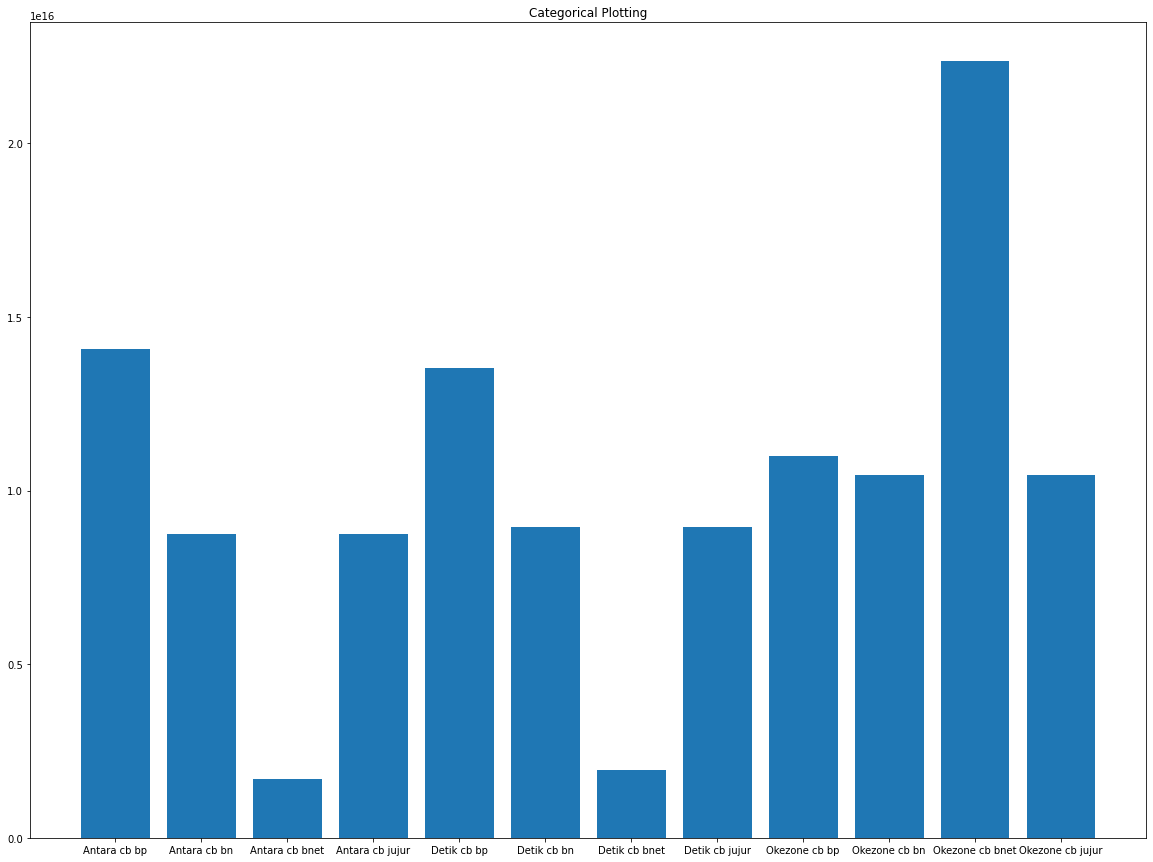

In [16]:
import matplotlib.pyplot as plt
names = ['Antara cb bp', 'Antara cb bn', 'Antara cb bnet', 'Antara cb jujur', "Detik cb bp", "Detik cb bn", "Detik cb bnet", "Detik cb jujur", "Okezone cb bp", "Okezone cb bn", "Okezone cb bnet", "Okezone cb jujur"]
values = [14080393513181155 , 8738759511182845 , 1682806855737453 , 8738759511182845, 13525883022185448, 8951750530071884, 1962300253400217, 8951750530071884, 10996500276293977, 10443912322711364, 22361392521643028, 10443912322711364]

plt.figure(figsize=(20, 15))

plt.bar(names, values)
plt.title('Categorical Plotting')
plt.show()

In [17]:
# Antara cb bp 0.14080393513181155 3664 26022
# Detik cb bp 0.13525883022185448 5231 38674
# Okezone cb bp 0.10996500276293977 1194 10858

# Antara cb bn 0.08738759511182845 3664 26022
# Detik cb bn 0.08951750530071884 5231 38674
# Okezone cb bn 0.10443912322711364 1194 10858

# Antara cb bnet 0.1682806855737453 3664 26022
# Detik cb bnet 0.1962300253400217 5231 38674
# Okezone cb bnet 0.22361392521643028 1194 10858

# Antara cb jujur 0.08738759511182845 3664 26022
# Detik cb jujur 0.08951750530071884 5231 38674
# Okezone cb jujur 0.10443912322711364 1194 1085

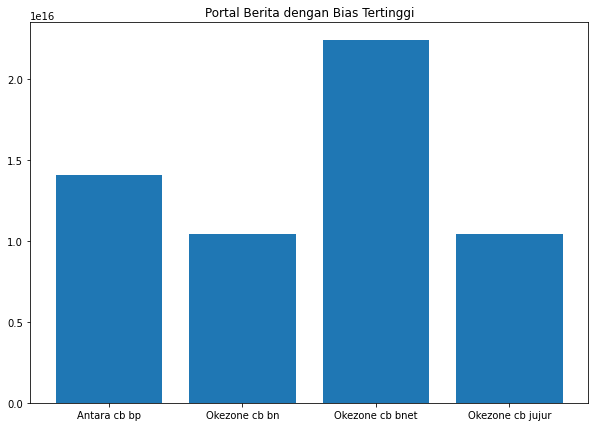

In [18]:
import matplotlib.pyplot as plt
names = ['Antara cb bp', 'Okezone cb bn', 'Okezone cb bnet', 'Okezone cb jujur']
values = [14080393513181155 , 10443912322711364, 22361392521643028, 10443912322711364]

plt.figure(figsize=(10, 7))

plt.bar(names, values)
plt.title('Portal Berita dengan Bias Tertinggi')
plt.show()

In [20]:
topik = tabel[:,6]
kodekat = tabel[:,2]
bias_positif = tabel[:,-4]
tokoh = tabel[:,10]
sumber = tabel[:,1]

In [21]:
topik[[kodekat == 'K'] and [bias_positif == 1]]

c:\users\arman\anaconda3\envs\bps\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array(['Jumlah pasien', 'teknologi', 'Konsumsi Gas', ..., 'konstruksi',
       'teknologi', 'farmasi'], dtype=object)

In [22]:
orgdalam_antara = tokoh[[sumber == 'Antara'] and [bias_positif == 1]]
orgdalam_detik = tokoh[[sumber == 'Detik'] and [bias_positif == 1]]
orgdalam_oke = tokoh[[sumber == 'Okezone'] and [bias_positif == 1]]

c:\users\arman\anaconda3\envs\bps\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.
c:\users\arman\anaconda3\envs\bps\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
c:\users\arman\anaconda3\envs\bps\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

In [23]:
orgdalam_antara

array(["['Yansen', 'Airlangga Hartarto', 'Doni Monardo', 'Zainal Arifin Paliwang']",
       "['Mulyanto', 'Sukarno', 'Risbiani Fardaniah']", '[]', ...,
       "['Ali Fikri', 'Ricky', 'Ali', 'Rezky Herbiyono', 'Nurhadi', 'Ferdiansyah', 'Joko Susilo']",
       "['Gati', 'Gati Wibawaningsih', 'Bagus Imam Darmawan', 'Relationship Manager', 'Risbiani Fardaniah']",
       "['Ivermectin 12', 'Ivermectin', 'Remdesivir', 'Faisal Yunianto']"],
      dtype=object)

# Grafik Grafik

In [25]:
df

id   sumber kodekat kodesubkat  \
0      00e3395ef29   Antara       J          J   
1      00fadafbe7d   Antara       A         A2   
2      0126ee19f2a    Detik       F          F   
3      0133f12a935    Detik       D         D1   
4      01382b466ed   Antara       K         K1   
...            ...      ...     ...        ...   
75549  fffb5bfd7d5   Antara       K         K1   
75550  fffca0ed375    Detik       A       A1.b   
75551  fffddc5c58d  Okezone       I         I1   
75552  fffe2ad3afd  Okezone       K         K1   
75553  ffff018963e    Detik       K         K4   

                                   kategori  \
0                  Informasi dan Komunikasi   
1       Pertanian, Kehutanan, dan Perikanan   
2                                Konstruksi   
3                 Pengadaan Listrik dan Gas   
4      Jasa Perantara Keuangan dan Asuransi   
...                                     ...   
75549  Jasa Perantara Keuangan dan Asuransi   
75550   Pertanian, Kehutanan, dan Perikanan   
75551  Penyediaan Akomodasi dan Makan Minum   
75552  Jasa Perantara Keuangan dan Asuransi   
75553  Jasa Perantara Keuangan dan Asuransi   

                                             subkategori  \
0                               Informasi dan Komunikasi   
1                          Kehutanan dan Penebangan Kayu   
2                                             Konstruksi   
3                                      Ketenagalistrikan   
4                                Jasa Perantara Keuangan   
...                                                  ...   
75549                            Jasa Perantara Keuangan   
75550  Pertanian, Peternakan, Perburuan dan Jasa Pert...   
75551                               Penyediaan Akomodasi   
75552                            Jasa Perantara Keuangan   
75553                            Jasa Penunjang Keuangan   

                     katakunci     tanggal  \
0             Laporan keuangan  2021-02-05   
1                  hasil hutan  2021-01-10   
2                Infrastruktur  2021-01-24   
3                  Listrik PLN  2021-03-05   
4                   suku bunga  2021-05-20   
...                        ...         ...   
75549                   kredit  2021-06-16   
75550   Produksi Bawang Merah   2021-01-25   
75551            libur lebaran  2021-04-05   
75552                   kredit  2021-03-30   
75553  nilai perdagangan saham  2021-04-01   

                                            judul_berita  \
0      ASN penyeleweng dana infak Masjid Raya divonis...   
1      Apkasindo: RPP Cipta Kerja Sektor Kehutanan ru...   
2      Cile Diguncang Gempa, Belum Ada Laporan Kerusa...   
3                 Batam Bakal Punya PLTU Biomassa 200 MW   
4      Di Paripurna DPR, Sri Mulyani paparkan 5 fokus...   
...                                                  ...   
75549  Legislator: Perbankan berperan penting dukung ...   
75550  4 Sebab Pengusaha Resah Beras Murah Vietnam Re...   
75551  Mau Pergi ke Luar Kota saat Libur Lebaran? Waj...   
75552  Pengusaha Mikro Bakal Dapat BLT dan Kredit Mac...   
75553  Debut di Pasar Modal, Saham Kurir Makanan Onli...   

                                           konten_berita  \
0      Padang (ANTARA) - Oknum Aparatur Sipil Negara ...   
1      Jakarta (ANTARA) - Asosiasi Petani Kelapa Sawi...   
2      Santiago - Dua gempa bumi yang hampir bersamaa...   
3      Jakarta -\n\nBright PLN Batam akan membangun d...   
4      Reformasi struktural ini harus disertai pengua...   
...                                                  ...   
75549  Di samping itu, perbankan menjadi tulang pungg...   
75550  Jakarta -\n\nRembesnya beras Vietnam jenis jas...   
75551  PEMERINTAH Indonesia resmi melarang perjalanan...   
75552  JAKARTA - Provinsi Bali merupakan satu-satunya...   
75553  Jakarta -\n\nPerusahaan pengiriman makanan onl...   

                                              nama_tokoh  \
0                                              ['Rinto']   
1             

Text(0.5, 1.0, 'Grafik Kodekat')

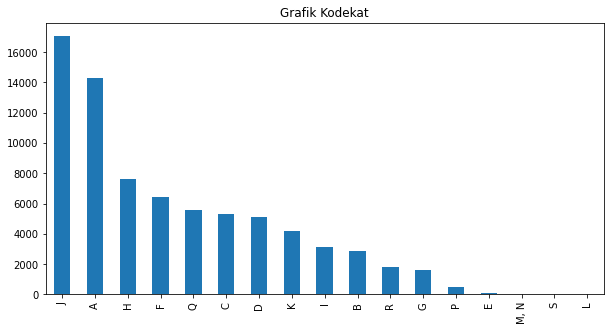

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

biaspos = df["kodekat"].value_counts()
biaspos.plot(kind='bar', figsize=(10, 5))
plt.title('Grafik Kodekat')


Text(0.5, 1.0, 'Grafik kodesubkat')

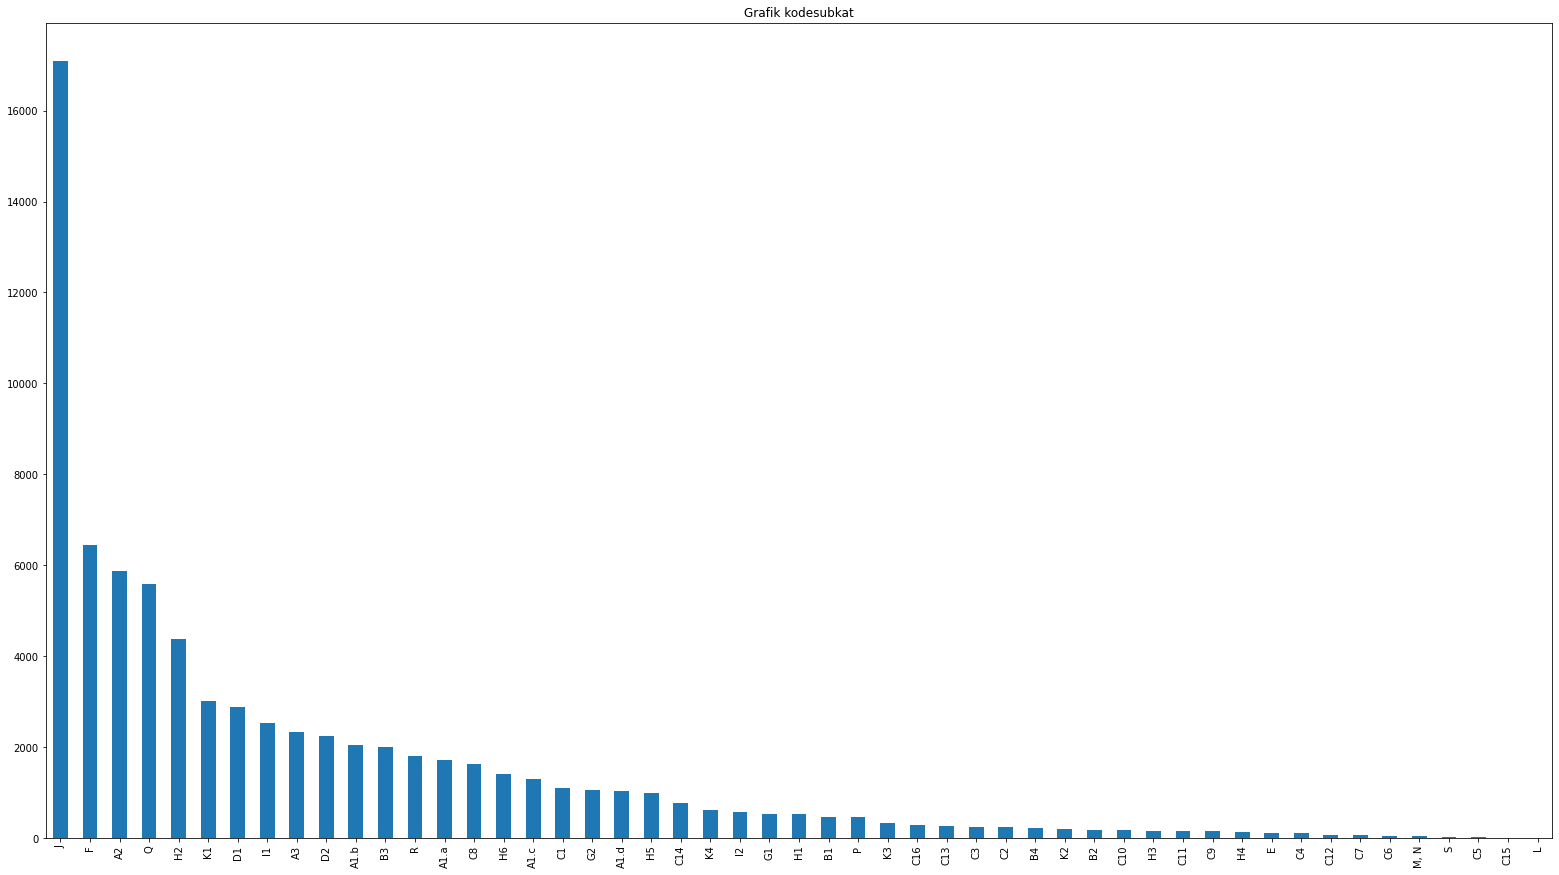

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

kodesubkat = df["kodesubkat"].value_counts()
kodesubkat.plot(kind='bar', figsize=(27, 15))
plt.title('Grafik kodesubkat')

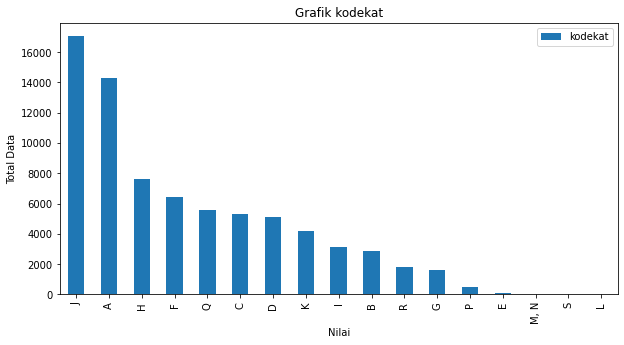

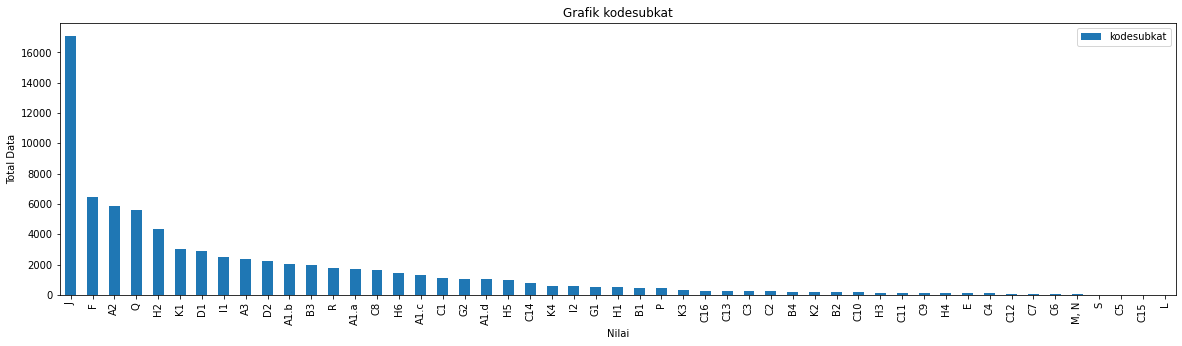

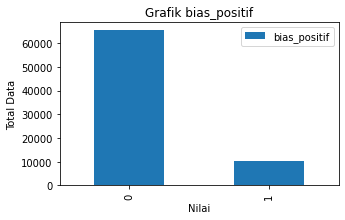

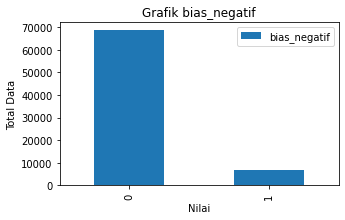

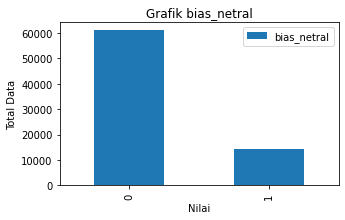

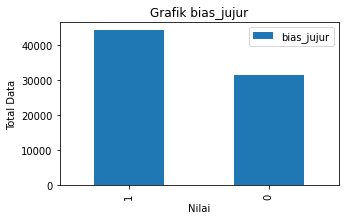

In [98]:
# df["bias_positif"].value_counts()
import matplotlib.pyplot as plt

kodekat = df["kodekat"].value_counts()
kodekat.plot(kind='bar', figsize=(10, 5))
plt.legend()
plt.xlabel("Nilai")
plt.ylabel("Total Data")
plt.title('Grafik kodekat')
plt.show()

kodesubkat = df["kodesubkat"].value_counts()
kodesubkat.plot(kind='bar', figsize=(20, 5))
plt.legend()
plt.xlabel("Nilai")
plt.ylabel("Total Data")
plt.title('Grafik kodesubkat')
plt.show()

biaspos = df["bias_positif"].value_counts()
biaspos.plot(kind='bar', figsize=(5, 3))
plt.legend()
plt.xlabel("Nilai")
plt.ylabel("Total Data")
plt.title('Grafik bias_positif')
plt.show()

biasneg = df["bias_negatif"].value_counts()
biasneg.plot(kind='bar', figsize=(5, 3))
plt.legend()
plt.xlabel("Nilai")
plt.ylabel("Total Data")
plt.title('Grafik bias_negatif')
plt.show()

biasnet = df["bias_netral"].value_counts()
biasnet.plot(kind='bar', figsize=(5, 3))
plt.legend()
plt.xlabel("Nilai")
plt.ylabel("Total Data")
plt.title('Grafik bias_netral')
plt.show()

biasjuj = df["bias_jujur"].value_counts()
biasjuj.plot(kind='bar', figsize=(5, 3))
plt.legend()
plt.xlabel("Nilai")
plt.ylabel("Total Data")
plt.title('Grafik bias_jujur')
plt.show()



In [104]:
print(df['bias_positif'].value_counts())
print(75554/65465)
print(75554/10089)
print(100/1.15)
print(100/7.48)
print("\n")
print(df['bias_negatif'].value_counts())
print(75554/68684)
print(75554/6870)
print(100/1.10)
print(100/10.99)
print("\n")
print(df['bias_netral'].value_counts())
print(75554/61158)
print(75554/14396)
print(100/1.23)
print(100/5.24)
print("\n")
print(df['bias_jujur'].value_counts())
print(75554/44199)
print(75554/31355)
print(100/1.70)
print(100/2.40)

0    65465
1    10089
Name: bias_positif, dtype: int64
1.154112884747575
7.488750123897314
86.95652173913044
13.36898395721925


0    68684
1     6870
Name: bias_negatif, dtype: int64
1.1000232950905597
10.997671033478893
90.9090909090909
9.099181073703367


0    61158
1    14396
Name: bias_netral, dtype: int64
1.2353903005330455
5.248263406501806
81.30081300813008
19.083969465648853


1    44199
0    31355
Name: bias_jujur, dtype: int64
1.7094051901626734
2.409631637697337
58.82352941176471
41.66666666666667
